# AMECX Fund Price Forecasting 

## Time Series Modeling Approach, by Jhonathan David Shaikh

## Business Understanding


This dataset represents a mutual fund facility called the The Income Fund of America, traded under the ticker name AMECX. In context, this fund is one representative from the more than 8,000 U.S. mutual funds available for investment in this asset class. The combined assets in US mutual funds was estimated  $22.11 trillion approximately as of the end of 2022.  but there is significant concentration of assets in a relatively small number of mutual fund families (with 50% of all assets held by Top 10 mutual fund families). Understanding mutual funds and having an idea on wether or not to invest in one can be a good advantage for the average or business investor. This analysis aims to help those individuals and provide a ground base for future analysis of other funds using ARIMA modeling.


## Data Understanding

Type of file : CSV 

Source: Yahoo Finance

### Feature Engeneering and Technical Indicators

Columns in our dataframe are explained as below and represent technical indicator in our dataset:


- Date : Index in our time series that specifies the date associated with the price. (USD) 


- Open Price: The first price of AMECX was purchased on the trading day (USD)



- Close Price: The last price of AMECX was purchased at the end of trading day (USD)



- High: The maximum price of AMECX was purchased on trading day (USD)



- Low: The minimum price of AMECX was purchased on the trading day (USD)



- Adjusted Closing Price: Stock exchanges witness buying and selling of millions of shares every minute. When the exchanges close, the last trading price of the stock is recorded as the closing price of the share (USD)


- Volume: The sum of actual trades made during the trading day (USD)

### Forecasting Methodology

Autoregressive moving average model will be used in Time Series (TS). In statistics and mathematics, TS is a series of data points indexed in time order. A time series is a sequence take at successive equally spaced points in time. 

## Data Preparation 


Let's get started by importing the data libraries and also taking a look at the dataset. We'll also check out information of the dataset and determined what kind of modifications, if at all, do I need to do to this dataset in order to prepare proper time-series analysis. 

### Importing Libraries

In [1]:
#Data Manipulation
import numpy as np
import pandas as pd
import datetime
from datetime import datetime as dt

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.dates import AutoDateLocator, ConciseDateFormatter
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('ggplot')

#Modeling & Forecasting
import itertools
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

import warnings
warnings.filterwarnings ('ignore')

#Statistical Modeling
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX


/Users/jonax/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.2) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


### Exploring Data and Researching the Dataset

In [2]:
#Reading the Data set 
df = pd.read_csv('AMECX.csv')

In [3]:
#Looking at the head and tail 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/2/18,23.120001,23.120001,23.120001,23.120001,17.198608,0
1,8/3/18,23.230000,23.230000,23.230000,23.230000,17.280434,0
2,8/6/18,23.240000,23.240000,23.240000,23.240000,17.287872,0
3,8/7/18,23.290001,23.290001,23.290001,23.290001,17.325071,0
4,8/8/18,23.290001,23.290001,23.290001,23.290001,17.325071,0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1252,7/26/23,23.240000,23.240000,23.240000,23.240000,23.240000,0
1253,7/27/23,23.120001,23.120001,23.120001,23.120001,23.120001,0
1254,7/28/23,23.219999,23.219999,23.219999,23.219999,23.219999,0
1255,7/31/23,23.250000,23.250000,23.250000,23.250000,23.250000,0
1256,8/1/23,23.150000,23.150000,23.150000,23.150000,23.150000,0


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
#Looking at the informaition types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


Based on initial dataset exploration, there are 1257 indexed rows, with all non-null values in those rows and 7 columns describing prices in this dataset . The types of data are clearly floats mostly with only 1 column (the Volume column) being an integer number. The index column numbers each entry row. The dataset represent

For time-series analysis, the structure of the dataset must be modified. The index must be the date, therefore I must re-index. It is also noted that there is no column labeled 'Date' despite the dates being under the un-named column. 

For this time series analysis, relevant columns must be kept, only the date and closing price columns are relevant columns for this analysis, I'll therefore re-format and drop irrelevant columnns. 

Changes and modifications to the dataset next.

### Data Cleaning & Preprocessing 

Changes to be made:

1. Setting Date to Index
2. Reformatting the dates properly
3. Drop irrelevant columns
4. Resampling to monthly

In [7]:
#Verifying Column got renamed
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/2/18,23.120001,23.120001,23.120001,23.120001,17.198608,0
1,8/3/18,23.230000,23.230000,23.230000,23.230000,17.280434,0
2,8/6/18,23.240000,23.240000,23.240000,23.240000,17.287872,0
3,8/7/18,23.290001,23.290001,23.290001,23.290001,17.325071,0
4,8/8/18,23.290001,23.290001,23.290001,23.290001,17.325071,0


#### Setting Index

In [8]:
#Setting Date column as Index
df=df.set_index('Date')

In [9]:
#Verifying Date is no longer a column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 8/2/18 to 8/1/23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1257 non-null   float64
 1   High       1257 non-null   float64
 2   Low        1257 non-null   float64
 3   Close      1257 non-null   float64
 4   Adj Close  1257 non-null   float64
 5   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.7+ KB


In [10]:
df.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
8/2/18,23.120001,23.120001,23.120001,23.120001,17.198608,0
8/3/18,23.230000,23.230000,23.230000,23.230000,17.280434,0


Now the Date is the index, however there are unnecessary columns that I don't need for Time Series (TS) analysis. I only need the index and the Closing price. I'll drop columns next. 

#### Dropping Unnecesary Columnns

In [11]:
#Dropping columns and creating a new dataset
drop = ['Open','High','Low', 'Adj Close', 'Volume']
df_cleaned = df.drop(columns = drop, axis=1)

#### New Dataset for Time Series (TS) : df_cleaned

In [12]:
#Looking at the cleaned dataset
df_cleaned

,Close
Date,
8/2/18,23.120001
8/3/18,23.230000
8/6/18,23.240000
8/7/18,23.290001
8/8/18,23.290001
...,...
7/26/23,23.240000
7/27/23,23.120001
7/28/23,23.219999


In [13]:
#Looking at the information on df_cleaned
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 8/2/18 to 8/1/23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1257 non-null   float64
dtypes: float64(1)
memory usage: 19.6+ KB


#### Index Modificaitons: index dtype to DateTime

In [14]:
#Verifying Index
df_cleaned.index

Index(['8/2/18', '8/3/18', '8/6/18', '8/7/18', '8/8/18', '8/9/18', '8/10/18',
       '8/13/18', '8/14/18', '8/15/18',
       ...
       '7/19/23', '7/20/23', '7/21/23', '7/24/23', '7/25/23', '7/26/23',
       '7/27/23', '7/28/23', '7/31/23', '8/1/23'],
      dtype='object', name='Date', length=1257)

We must change the index dtype to = DateTimeindex

In [15]:
#Changing index dtype='object' to index dtype= Date
df_cleaned.index=pd.to_datetime(df_cleaned.index)

In [16]:
#Verifying change
df_cleaned.index

DatetimeIndex(['2018-08-02', '2018-08-03', '2018-08-06', '2018-08-07',
               '2018-08-08', '2018-08-09', '2018-08-10', '2018-08-13',
               '2018-08-14', '2018-08-15',
               ...
               '2023-07-19', '2023-07-20', '2023-07-21', '2023-07-24',
               '2023-07-25', '2023-07-26', '2023-07-27', '2023-07-28',
               '2023-07-31', '2023-08-01'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

#### Resampling Methods : Downsampling- from Daily to Monthly

In [17]:
#Resampling Date format
df_cleaned.resample('MS').mean().index

DatetimeIndex(['2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01', '2019-02-01', '2019-03-01',
               '2019-04-01', '2019-05-01', '2019-06-01', '2019-07-01',
               '2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
               '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
               '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
               '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
               '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
               '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
               '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
               '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01',
      

The index has been resampled to monthly average data points.
With this data preprocessing steps we are ready to take a look at our data statistically and visually.

#### Checking Stats briefly

In [18]:
#Checking on some Stats
df_cleaned.describe()

,Close
count,1257.000000
mean,23.285489
std,1.625435
min,17.290001
25%,22.290001
50%,23.049999
75%,24.389999
max,26.500000


In [19]:
df_cleaned

,Close
Date,
2018-08-02,23.120001
2018-08-03,23.230000
2018-08-06,23.240000
2018-08-07,23.290001
2018-08-08,23.290001
...,...
2023-07-26,23.240000
2023-07-27,23.120001
2023-07-28,23.219999


The information above, gives us a view into the fund statistics before we begin to prepare for modeling and visualizng the current data trends: 

- The count of data points remain is 1257

- With a mean value of the fund at $23.28

- The minimum price has been 17.29, and the max 26.50.

With this information and the data pre-processed, I'll visualize the data to understand it further, in further preparation for modeling the data with Time Series (TS) ARIMA Modeling. 


In [20]:
#Making Dataset per month
y= df_cleaned['Close'].resample('MS').mean()

In [21]:
y['2018':]

Date
2018-08-01    23.250000
2018-09-01    23.200526
2018-10-01    22.623044
2018-11-01    22.536190
2018-12-01    21.397895
                ...    
2023-04-01    22.904211
2023-05-01    22.564091
2023-06-01    22.641905
2023-07-01    22.993000
2023-08-01    23.150000
Freq: MS, Name: Close, Length: 61, dtype: float64

In [22]:
#Making Dataset per year
p= df_cleaned['Close'].resample('BA-DEC').mean()

In [23]:
p['2018':]

Date
2018-12-31    22.619808
2019-12-31    22.403532
2020-12-31    21.843636
2021-12-31    25.503056
2022-12-30    23.963984
2023-12-29    22.783035
Freq: BA-DEC, Name: Close, dtype: float64

### Visualizing Data

Providing various types of visualization charts and techniques to understand the Time Series (TS). 

#### Time Series Line Plot

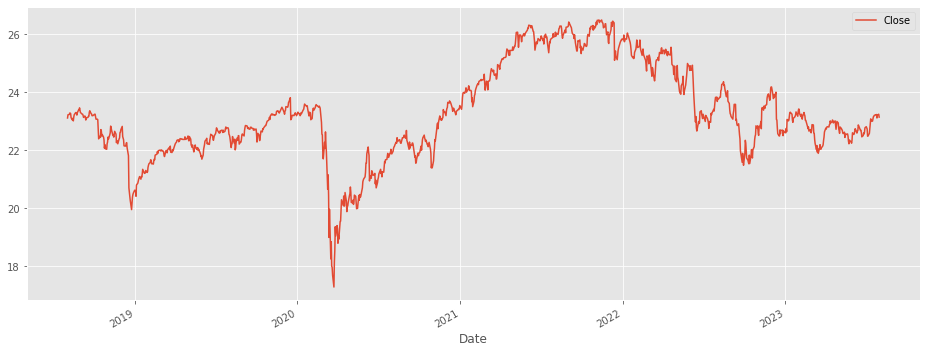

In [24]:
# Draw a line plot using nyse and .plot() method 
df_cleaned.plot(figsize = (16,6));

In this TS Line Plot, we can see the data points, Monthly Closing Prices, flowing through time from 2018 through 2023. The chart verifies and visualizes our statistical analysis. Furthermore, it provides and idea of when those values occurred, for example, for the min value at $17.29, we can realize it occurred somewhere in the first quarter of 2020. This makes sense as the Covid pandemic caused and economic shut-down, clearly the fund was affected and the price dropped. The fund highes value occurred near the end of 2022 as seen at the peak of the TS in this chart.

#### Time series dot plot

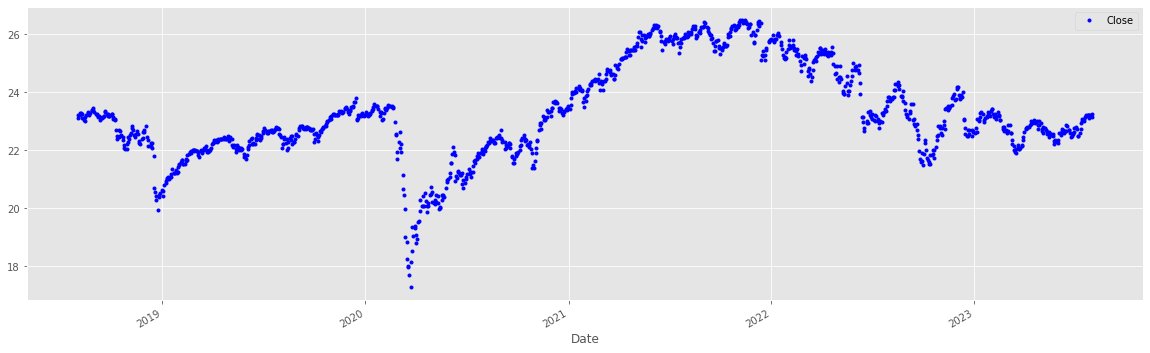

In [25]:
# Draw a dot plot using temp and .plot() method 
df_cleaned.plot(figsize = (20,6), style = '.b');

Above a change in style, arriving to the same conclusions as in the line plot. 

#### Grouping and visualizing Time Series

Grouping the closing price on a per year basis can be extremely helpful in knowing how the fund behave year over year in comparisson.  This visualization for TS can be a great was of understanding the behavior on a per year basis. 

##### Using Loop for Grouping 

In [26]:
#using pandas grouper
year_groups = p.groupby(pd.Grouper(freq='A'))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

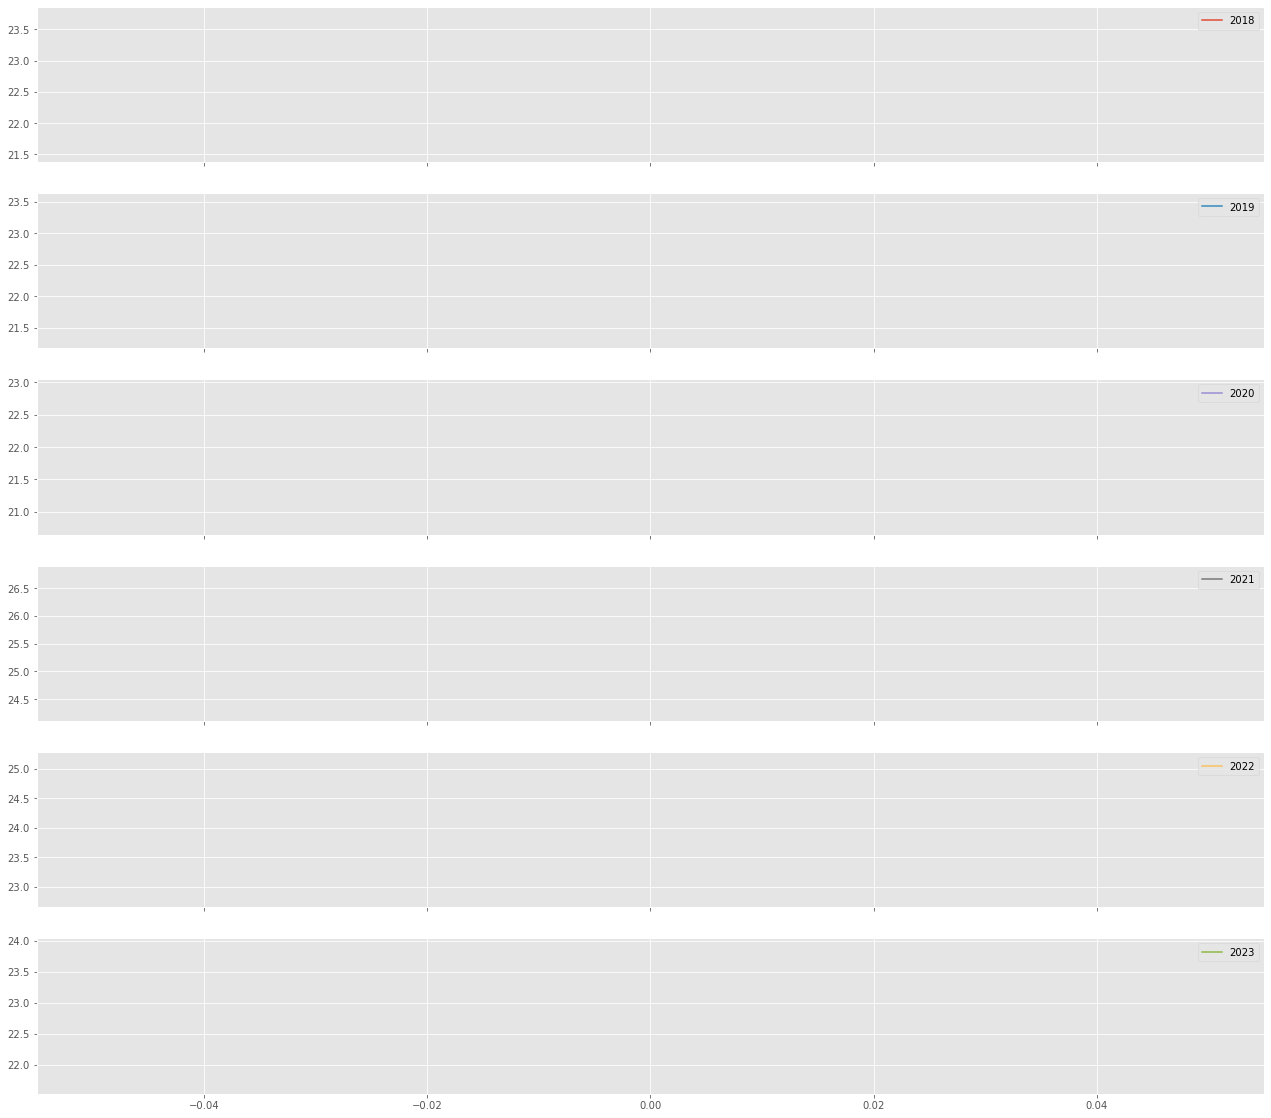

In [27]:
#New data set and store values in columns
temp_annual= pd.DataFrame()

for yr, group in year_groups:
    temp_annual[yr.year] = group.values.ravel()

#Plot yearly groups as subplots
temp_annual.plot(figsize=(22,20), subplots=True, legend=True)

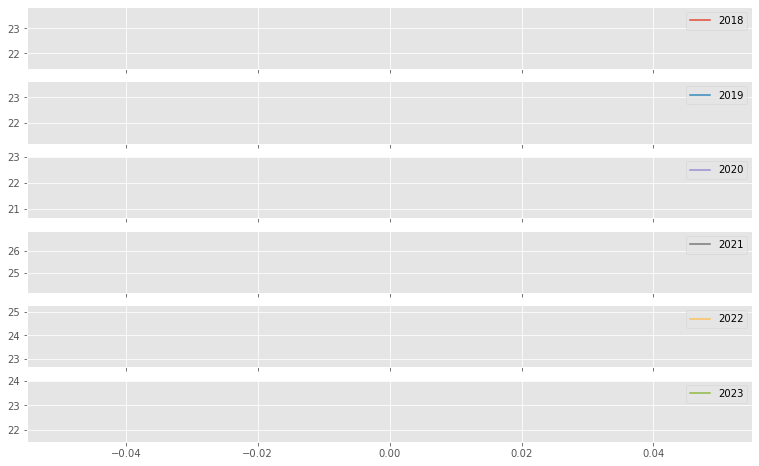

In [28]:
# a new DataFrame to store yearly values in columns 
df_cleaned_yr_grouped = pd.DataFrame()

for yr, group in year_groups:
    df_cleaned_yr_grouped[yr.year] = group.values.ravel()
    
# Plot the yearly groups as subplots
df_cleaned_yr_grouped.plot(figsize = (13,8), subplots=True, legend=True);

#### Time Series Histograms and Density Plots

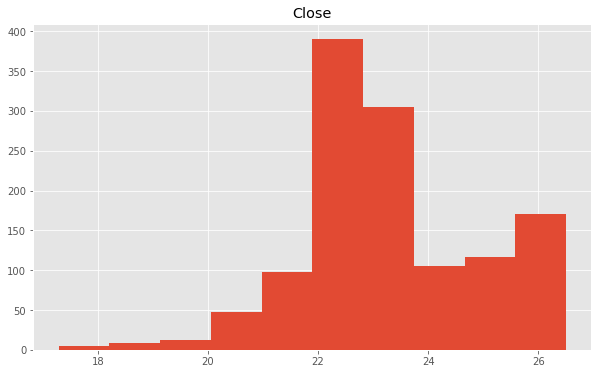

In [29]:
df_cleaned.hist(figsize = (10,6));

The plot shows a distribution that doesn't exactly look Gaussian/Normal. The plotting function automatically selected the size of the bins based on the spread of values in the data here. Let's see what happens if we set the number of bins equal to 7.

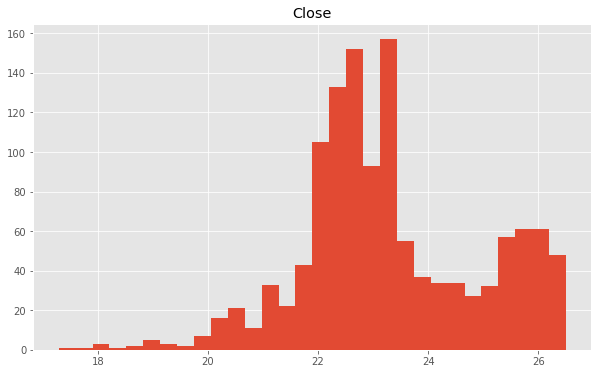

In [30]:
df_cleaned.hist(figsize = (10,6), bins = 30);

This already looks more normal. With stock exchange returns, it is to be expected that on average, the returns will be 0 and have a Gaussian distribution around that. With only 6 years of monthly data, it is to be expected that the distribution does not exactly look Gaussian.

We can also get a better idea of the shape of the distribution of observations by using a density plot which is like the histogram, except a function is used to fit the distribution of observations with smoothing to summarize this distribution.

##### Density Plot

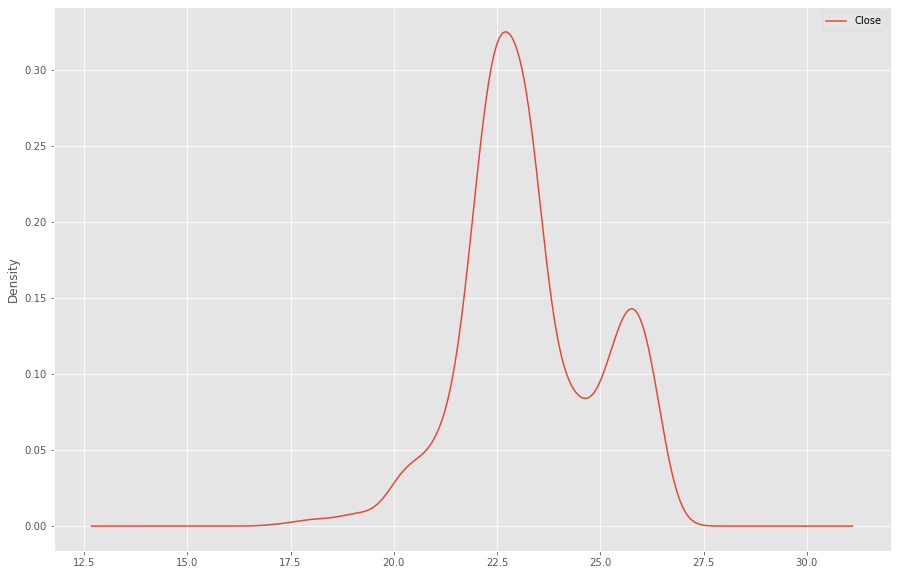

In [31]:
# Plot a density plot for nyse dataset
df_cleaned.plot(kind='kde', figsize = (15,10));

We can see that the density plot provides a clearer summary of the distribution of observations. We can see that perhaps the distribution is more Gaussian than we were able to see in the histogram.

Seeing a distribution like this may suggest later exploring statistical hypothesis tests to formally check if the distribution is Gaussian and perhaps data preparation techniques to reshape the distribution.

## Storing for Modeling 

In [32]:
%store df_cleaned

Stored 'df_cleaned' (DataFrame)
